In [4]:
from __future__ import division, print_function
import pandas as pd
import numpy as np
import quantiacsToolbox
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.tsa.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
futuresList = ['CASH','F_AD','F_BO','F_BP','F_C','F_CC','F_CD','F_CL','F_CT',
               'F_DX','F_EC','F_ED','F_ES','F_FC','F_FV','F_GC','F_HG','F_HO',
               'F_JY','F_KC','F_LB','F_LC','F_LN','F_MD','F_MP','F_NG','F_NQ',
               'F_NR','F_O','F_OJ','F_PA','F_PL','F_RB','F_RU','F_S','F_SB',
               'F_SF','F_SI','F_SM','F_TU','F_TY','F_US','F_W','F_XX','F_YM',
               'F_AX','F_CA','F_DT','F_UB','F_UZ','F_GS','F_LX','F_SS','F_DL',
               'F_ZQ','F_VX','F_AE','F_BG','F_BC','F_LU','F_DM','F_AH','F_CF',
               'F_DZ','F_FB','F_FL','F_FM','F_FP','F_FY','F_GX','F_HP','F_LR',
               'F_LQ','F_ND','F_NY','F_PQ','F_RR','F_RF','F_RP','F_RY','F_SH',
               'F_SX','F_TR','F_EB','F_VF','F_VT','F_VW','F_GD','F_F']

In [2]:
indicators = pd.read_csv('./EconomicIndicators.csv')
# quantiacsToolbox.loadData(marketList=futuresList,
#                           dataToLoad=indicators['Code'])

In [27]:
indicators

,Country,Category,Code
0,United States,ADP Employment Change,USA_ADP
1,United States,Average Hourly Earnings,USA_EARN
2,United States,Average Weekly Hours,USA_HRS
3,United States,Balance of Trade,USA_BOT
4,United States,Business Confidence,USA_BC
5,United States,Business Inventories,USA_BI
6,United States,Capacity Utilization,USA_CU
7,United States,Capital Flows,USA_CF
8,United States,Challenger Job Cuts,USA_CHJC
9,United States,Chicago Fed National Activity Index,USA_CFNAI


In [62]:
files = filter(lambda x: 'F_' in x, os.listdir('./tickerData/'))
res = []
for filename in files:
    res.append(pd.read_table('./tickerData/' + filename, sep=',', index_col='DATE',
                             parse_dates=True, skipinitialspace=True)['CLOSE'])

res = pd.concat(res, axis=1, join='outer')
res.columns = map(lambda x: x[:-4], files)

In [21]:
df = pd.read_csv('./full_data_futures.csv', index_col='DATE', parse_dates=True, infer_datetime_format=True)
df = df['2010-01-01':].asfreq('D').asfreq('B').fillna(method='ffill')

Check if there is serial autocorrelation at 40 lags for all Futures

In [12]:
df.apply(lambda x: np.less_equal(acorr_ljungbox(x)[1], 0.001).all(), axis=0).all()

True

In [53]:
# take top 10 uncorrelated futures for VAR model, should replace with Granger tests
uncorr = df.pct_change().corr().abs().sum()\
                .sort_values(ascending=True)\
                .index[:10].tolist()

In [22]:
correl = df.pct_change().corr().abs().sum()\
                .sort_values(ascending=False)\
                .index[:10].tolist()

In [55]:
df[uncorr].pct_change().corr()

,F_DL,F_ZQ,F_LN,F_HP,F_EB,F_NG,F_OJ,F_ED,F_SS,F_FL
F_DL,1.000000,0.003567,0.021563,-0.023159,-0.037309,-0.016144,-0.014016,0.010705,0.022823,0.014377
F_ZQ,0.003567,1.000000,-0.017838,-0.032422,0.002585,-0.027650,0.015467,0.012128,0.068232,0.054855
F_LN,0.021563,-0.017838,1.000000,0.024873,-0.019703,0.024512,0.027323,0.020702,-0.007780,0.059274
F_HP,-0.023159,-0.032422,0.024873,1.000000,0.015240,0.892527,0.018143,0.001436,0.023128,0.008403
F_EB,-0.037309,0.002585,-0.019703,0.015240,1.000000,0.013182,-0.022096,0.134223,0.210957,-0.028564
F_NG,-0.016144,-0.027650,0.024512,0.892527,0.013182,1.000000,0.028783,0.014491,0.016155,0.009459
F_OJ,-0.014016,0.015467,0.027323,0.018143,-0.022096,0.028783,1.000000,0.026649,-0.028710,0.049675
F_ED,0.010705,0.012128,0.020702,0.001436,0.134223,0.014491,0.026649,1.000000,0.186878,0.008616
F_SS,0.022823,0.068232,-0.007780,0.023128,0.210957,0.016155,-0.028710,0.186878,1.000000,0.016445
F_FL,0.014377,0.054855,0.059274,0.008403,-0.028564,0.009459,0.049675,0.008616,0.016445,1.000000


In [56]:
df[correl].pct_change().corr()

,F_FM,F_FY,F_CA,F_AX,F_AE,F_XX,F_ES,F_DM,F_MD,F_YM
F_FM,1.000000,0.958901,0.868259,0.807734,0.904959,0.842089,0.598357,0.918480,0.596573,0.597674
F_FY,0.958901,1.000000,0.905795,0.841378,0.932955,0.899792,0.622674,0.896168,0.608508,0.626093
F_CA,0.868259,0.905795,1.000000,0.821627,0.889763,0.848581,0.621983,0.842289,0.605338,0.622296
F_AX,0.807734,0.841378,0.821627,1.000000,0.812778,0.877626,0.738619,0.826352,0.716670,0.723772
F_AE,0.904959,0.932955,0.889763,0.812778,1.000000,0.855990,0.607701,0.859639,0.596063,0.610579
F_XX,0.842089,0.899792,0.848581,0.877626,0.855990,1.000000,0.693911,0.795526,0.663361,0.685983
F_ES,0.598357,0.622674,0.621983,0.738619,0.607701,0.693911,1.000000,0.607856,0.937562,0.969905
F_DM,0.918480,0.896168,0.842289,0.826352,0.859639,0.795526,0.607856,1.000000,0.609543,0.605082
F_MD,0.596573,0.608508,0.605338,0.716670,0.596063,0.663361,0.937562,0.609543,1.000000,0.889665
F_YM,0.597674,0.626093,0.622296,0.723772,0.610579,0.685983,0.969905,0.605082,0.889665,1.000000


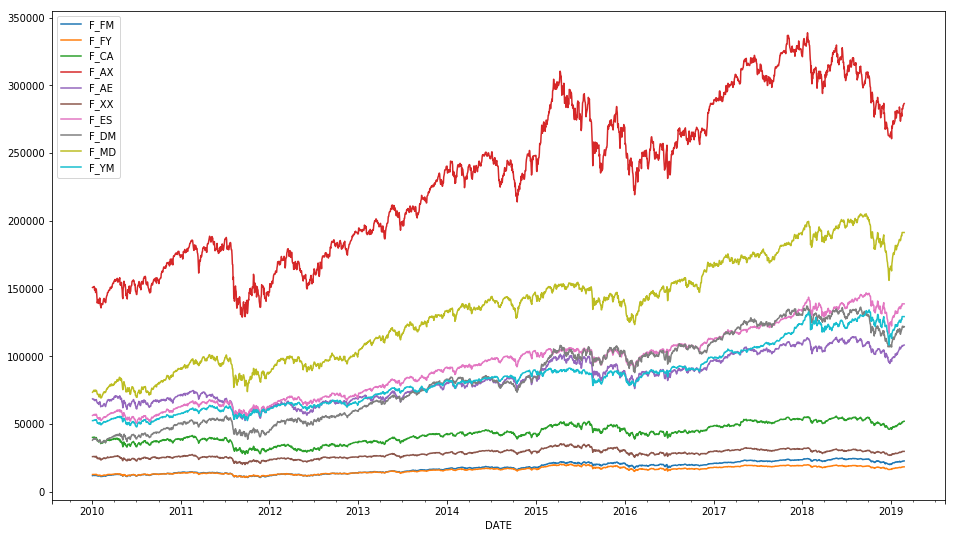

In [57]:
df[correl].plot(figsize=(16,9))

In [23]:
train = df[correl].pct_change().dropna()[:'2018-02'] # ~85% of data
test = df[correl].pct_change().dropna()['2018-03':] # roughly 1 trading year, 258 days

In [60]:
model_VAR_cor = sm.VAR(train)
res_VAR_cor = model_VAR_cor.fit(maxlags=40, # 2 trading months look back
                            ic='aic',
                            trend='c') # most futures trending over time
res_VAR_cor.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 02, Mar, 2019
Time:                     16:38:18
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -108.470
Nobs:                     2124.00    HQIC:                  -108.994
Log likelihood:           86244.5    FPE:                3.41339e-48
AIC:                     -109.296    Det(Omega_mle):     2.95297e-48
--------------------------------------------------------------------
Results for equation F_FM
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.000273         0.000228            1.196           0.232
L1.F_FM         0.135963         0.101337            1.342           0.180
L1.F_FY        -0.265413         0.128040           -2.073           0.038
L1.F_CA   

In [48]:
[sm.adfuller(train[future])[1] for future in train.columns] # All are stationary

[9.0993430260956045e-10,
 0.0,
 0.0,
 0.0,
 5.9325760725479565e-18,
 1.9714626615181959e-22,
 0.0,
 1.581260353306728e-25,
 0.0,
 5.7862222810479078e-16]

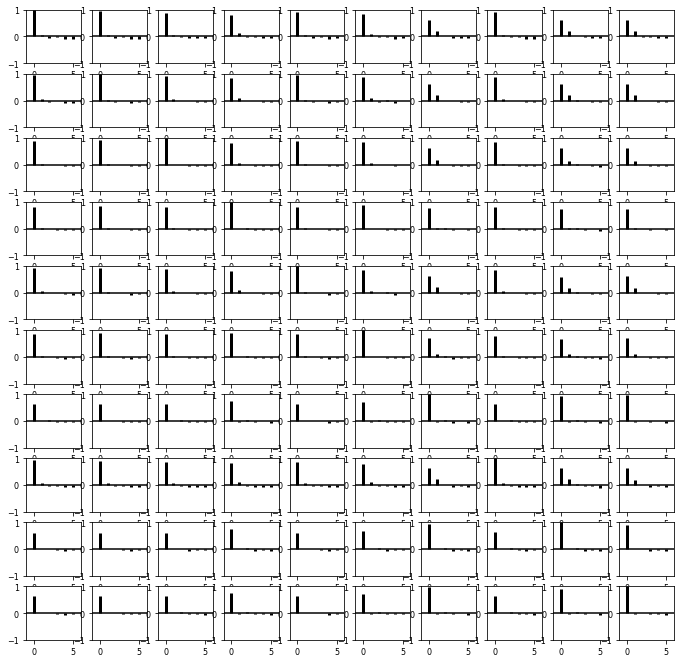

In [99]:
res_VAR_cor.plot_sample_acorr(linewidth=3, nlags=5);

In [112]:
res_VAR_cor.k_ar # lag order of 3 selected based on AIC

3

In [105]:
(res_VAR_cor.pvalues < 0.05).replace(False, '.')

,F_FM,F_FY,F_CA,F_AX,F_AE,F_XX,F_ES,F_DM,F_MD,F_YM
const,.,.,.,.,.,.,True,True,True,True
L1.F_FM,.,True,.,.,.,.,.,.,True,.
L1.F_FY,True,True,.,.,.,.,.,True,.,.
L1.F_CA,.,.,True,.,.,.,.,.,.,.
L1.F_AX,.,.,.,True,.,.,.,True,.,.
L1.F_AE,.,.,.,.,.,.,.,.,.,.
L1.F_XX,.,.,True,.,.,True,.,.,.,.
L1.F_ES,True,True,True,.,True,True,.,True,.,.
L1.F_DM,.,.,.,.,.,.,.,True,.,.
L1.F_MD,.,.,.,.,.,.,.,.,.,.


In [129]:
test = train.tail(3).append(test)

In [145]:
rolling_preds = {}
for i in range(3, test.shape[0]):
    rolling_preds[i] = res_VAR_cor.forecast(test.head(i).values, 1).tolist()[0]

In [151]:
rolling_preds_ = pd.DataFrame.from_dict(rolling_preds, orient='index', columns=test.columns)
rolling_preds_.index = test['2018-03':].index

In [154]:
rolling_preds_.head()

,F_FM,F_FY,F_CA,F_AX,F_AE,F_XX,F_ES,F_DM,F_MD,F_YM
DATE,,,,,,,,,,
2018-03-01,-0.002980,-0.002862,-0.004616,-0.000796,-0.003072,-0.002043,0.001546,-0.003226,0.001065,0.001580
2018-03-02,-0.002170,-0.002666,-0.005126,0.001778,-0.004087,0.000173,0.002889,-0.000954,0.002049,0.002019
2018-03-05,0.008211,0.007606,0.007602,0.005291,0.006580,0.006964,0.001166,0.009371,0.001670,0.001368
2018-03-06,0.008768,0.007881,0.010931,0.004979,0.008022,0.005446,0.001132,0.010388,0.002052,0.001498
2018-03-07,-0.000037,-0.000635,0.000134,-0.000971,-0.000800,-0.001980,-0.002253,0.002145,-0.002624,-0.001682


In [158]:
from sklearn.metrics import mean_absolute_error

In [164]:
for column in rolling_preds_.columns:
    mse = mean_absolute_error(test.tail(rolling_preds_.shape[0])[column],
                             rolling_preds_[column])
    print('{} MAE % = {}'.format(column, mse * 100))

F_FM MAE % = 0.649321623835
F_FY MAE % = 0.620348696923
F_CA MAE % = 0.66948931845
F_AX MAE % = 0.755392039006
F_AE MAE % = 0.637694739998
F_XX MAE % = 0.619206747633
F_ES MAE % = 0.698646482957
F_DM MAE % = 0.762203753662
F_MD MAE % = 0.696300856732
F_YM MAE % = 0.738760376914


In [171]:
rolling_preds_.columns.tolist()

['F_FM',
 'F_FY',
 'F_CA',
 'F_AX',
 'F_AE',
 'F_XX',
 'F_ES',
 'F_DM',
 'F_MD',
 'F_YM']

# Algos

In [106]:
putrid= {}
putrid['markets'] = ['CASH', 'F_FM', 'F_FY', 'F_CA', 'F_AX', 'F_AE',
                       'F_XX', 'F_ES', 'F_DM', 'F_MD', 'F_YM'] # futuresList
putrid['beginInSample'] = '20100101'
putrid['endInSample'] = '20181231'
putrid['lookback']= 252
putrid['budget']= 10**6
putrid['slippage']= 0.05
putrid['nlags'] = 15

c = df[correl].values

d = sm.VAR((np.diff(c, n=1, axis=0) / c[1:])[-252:]).fit()

d.forecast((np.diff(c, n=1, axis=0) / c[1:]), 1)

e = VAR_model(c, putrid)[0]

In [24]:
def VAR_model(CLOSE, settings):
    """Using a naive Vector Auto-regressive model to predict price momentum and long/short."""
    def predict(data, lookback, nlags=15, metric='aic'):
        model = sm.VAR(data[-lookback:]).fit(maxlags=nlags,
                                             ic=metric,
                                             trend='c')
        lag_order = model.k_ar
        return np.sum(model.forecast(data[-lag_order:], 3),
                      axis=0) # Predict 5 days worth of price movements
        
    nMarkets = len(settings['markets'])
    lookback = settings['lookback']
    nlags = settings['nlags']

    pos = np.zeros((1, nMarkets), dtype=np.float32) # position
    try:
        CLOSE = np.delete(CLOSE, 0, axis=1) # remove CASH column
        data = np.diff(CLOSE, n=1, axis=0) / CLOSE[1:]
        preds = predict(data, lookback, nlags)

        weights = np.where(preds < -5e-3, -1,
                           np.where(preds > 5e-3, 1,
                                    0)) # 'confidence' interval
        weights = np.insert(weights, 0, 0.)
        weights = weights / np.sum(abs(weights)) # normalize weights 
    except:
#         print(e)
        weights = pos
        
    return weights, settings

In [14]:
def trend_following(DATE, OPEN, HIGH, LOW, CLOSE, VOL, exposure, equity, settings):
    ''' This system uses trend following techniques to allocate capital into the desired equities'''

    nMarkets=CLOSE.shape[1]

    periodLonger=200
    periodShorter=40

    # Calculate Simple Moving Average (SMA)
    smaLongerPeriod=np.nansum(CLOSE[-periodLonger:,:],axis=0)/periodLonger
    smaShorterPeriod=np.nansum(CLOSE[-periodShorter:,:],axis=0)/periodShorter

    longEquity= smaShorterPeriod > smaLongerPeriod
    shortEquity= ~longEquity

    pos=np.zeros(nMarkets)
    pos[longEquity]=1
    pos[shortEquity]=-1

    weights = pos/np.nansum(abs(pos))

    return weights, settings

In [15]:
def mean_reversion(DATE, CLOSE, settings):
    ''' This system uses mean reversion techniques to allocate capital into the desired equities '''

    # This strategy evaluates two averages over time of the close over a long/short
    # scale and builds the ratio. For each day, "smaQuot" is an array of "nMarkets"
    # size.
    nMarkets = np.shape(CLOSE)[1]
    periodLong = 200
    periodShort = 40

    smaLong = np.sum(CLOSE[-periodLong:, :], axis=0)/periodLong
    smaRecent = np.sum(CLOSE[-periodShort:, :], axis=0)/periodShort
    smaQuot = smaRecent / smaLong

    # For each day, scan the ratio of moving averages over the markets and find the
    # market with the maximum ratio and the market with the minimum ratio:
    longEquity = np.where(smaQuot == np.nanmin(smaQuot))
    shortEquity = np.where(smaQuot == np.nanmax(smaQuot))

    # Take a contrarian view, going long the market with the minimum ratio and
    # going short the market with the maximum ratio. The array "pos" will contain
    # all zero entries except for those cases where we go long (1) and short (-1):
    pos = np.zeros((1, nMarkets))
    pos[0, longEquity[0][0]] = 1
    pos[0, shortEquity[0][0]] = -1

    # For the position sizing, we supply a vector of weights defining our
    # exposure to the markets in settings['markets']. This vector should be
    # normalized.
    pos = pos/np.nansum(abs(pos))

    return pos, settings


# Backtest

In [29]:
class myStrategy(object):
    
    def myTradingSystem(self, DATE, OPEN, HIGH, LOW, CLOSE, VOL, exposure, equity, settings):
        ''' Use appropriate algorithm and return results of that function. '''
#         weights, settings = trend_following(DATE, OPEN, HIGH, LOW, CLOSE, VOL,
#                                             exposure, equity, settings)
        weights, settings = VAR_model(CLOSE, settings)
        return weights, settings
    
    def mySettings(self):
        ''' Define your trading system settings here '''

        settings= {}
        # Naively select top 10 futures that are highly correlated with each other
        settings['markets'] = ['CASH', 'F_FM', 'F_FY', 'F_CA', 'F_AX', 'F_AE',
                               'F_XX', 'F_ES', 'F_DM', 'F_MD', 'F_YM'] # futuresList
        settings['beginInSample'] = '20100101'
        settings['endInSample'] = '20181231'
        settings['lookback']= 252
        settings['budget']= 10**6
        settings['slippage']= 0.05
        settings['nlags'] = 15

        return settings

Loading Data...
Done!
Evaluating Trading System <class '__main__.myStrategy'>


C:\Users\Hong Jie\Anaconda3\envs\python27\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


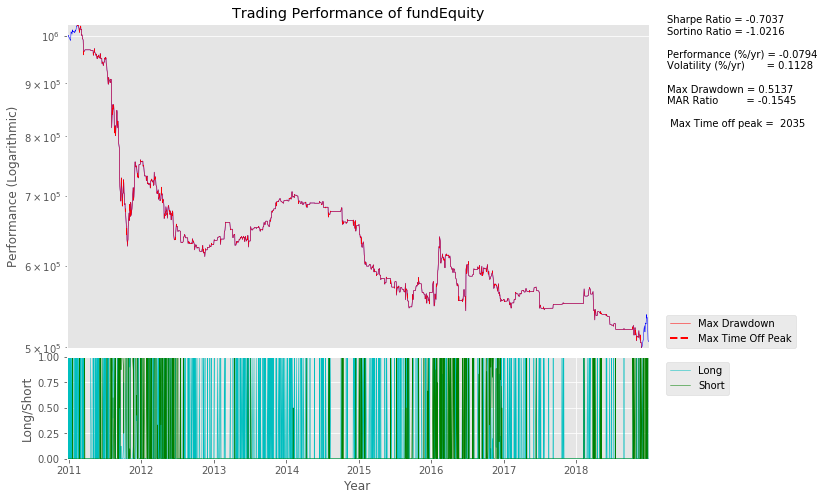

In [30]:
from quantiacsToolbox import runts

result = runts(myStrategy)